In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'mcdonalds.csv' 
df = pd.read_csv(file_path)

In [3]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [4]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [6]:
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Summary Statistics for Numerical Columns:
               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000


In [7]:
print("\nSummary Statistics for Categorical Columns:")
print(df.describe(include=['object']))


Summary Statistics for Categorical Columns:
       yummy convenient spicy fattening greasy  fast cheap tasty expensive  \
count   1453       1453  1453      1453   1453  1453  1453  1453      1453   
unique     2          2     2         2      2     2     2     2         2   
top      Yes        Yes    No       Yes    Yes   Yes   Yes   Yes        No   
freq     803       1319  1317      1260    765  1308   870   936       933   

       healthy disgusting  Like VisitFrequency  Gender  
count     1453       1453  1453           1453    1453  
unique       2          2    11              6       2  
top         No         No    +3   Once a month  Female  
freq      1164       1100   229            439     788  


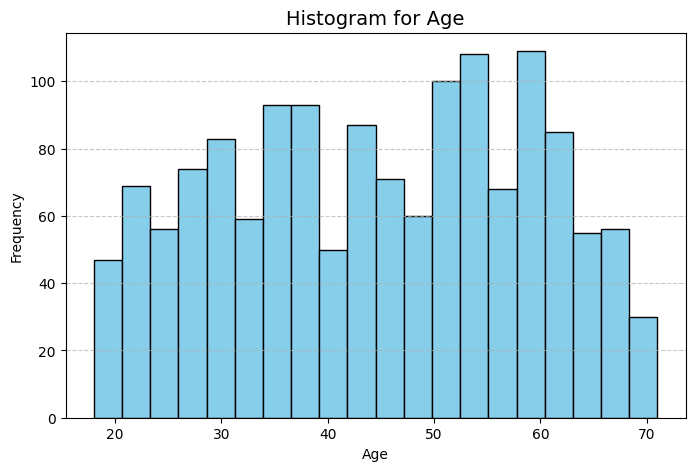

In [8]:
def plot_individual_histograms(df):
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 5))
        plt.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram for {column}', fontsize=14)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
plot_individual_histograms(df)



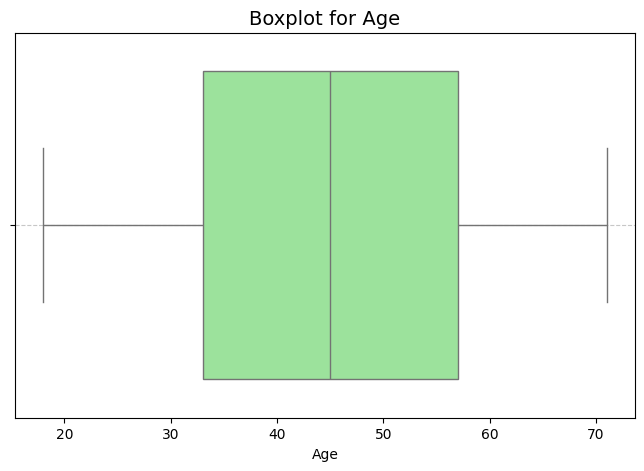

In [9]:
def plot_individual_boxplots(df):
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[column], color='lightgreen')
        plt.title(f'Boxplot for {column}', fontsize=14)
        plt.xlabel(column)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
plot_individual_boxplots(df)


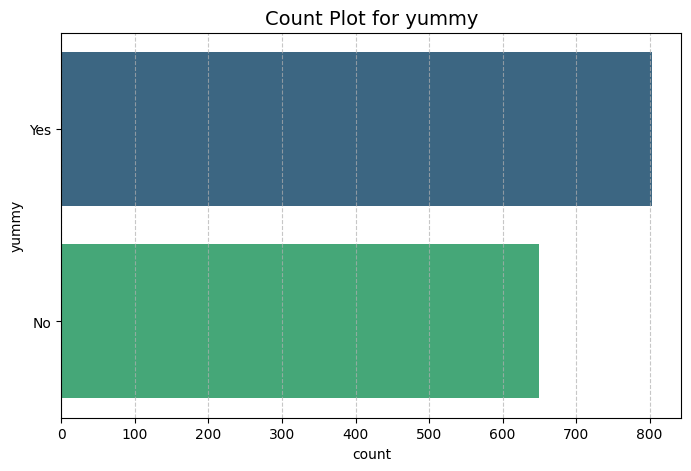

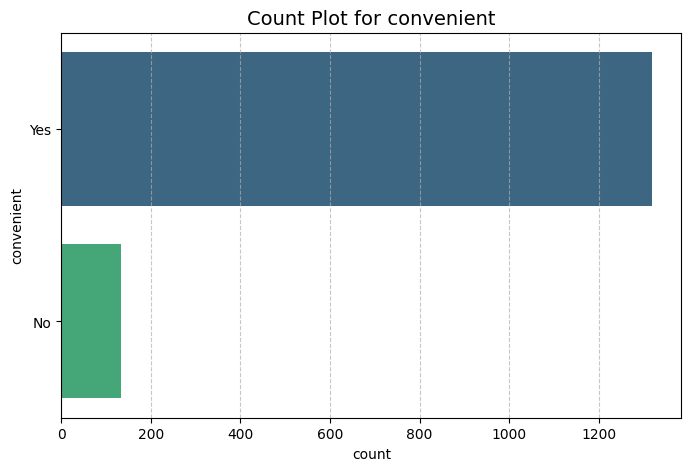

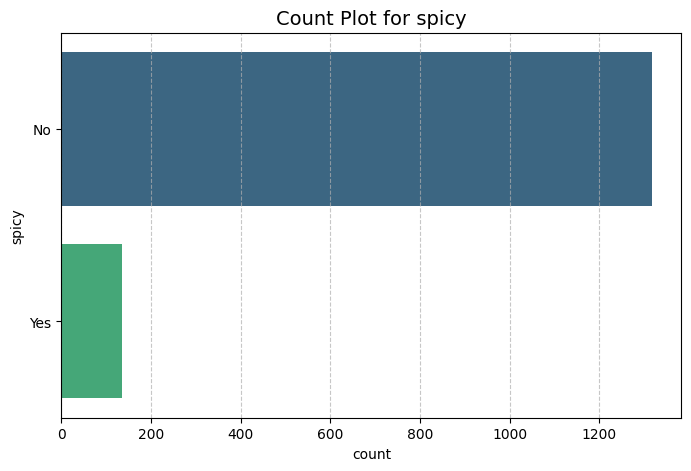

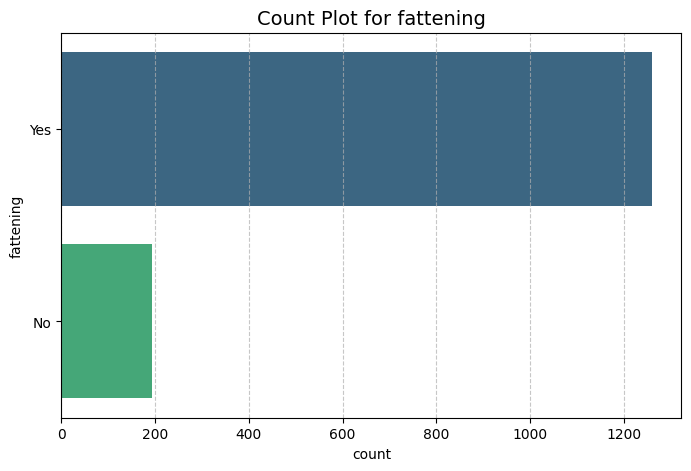

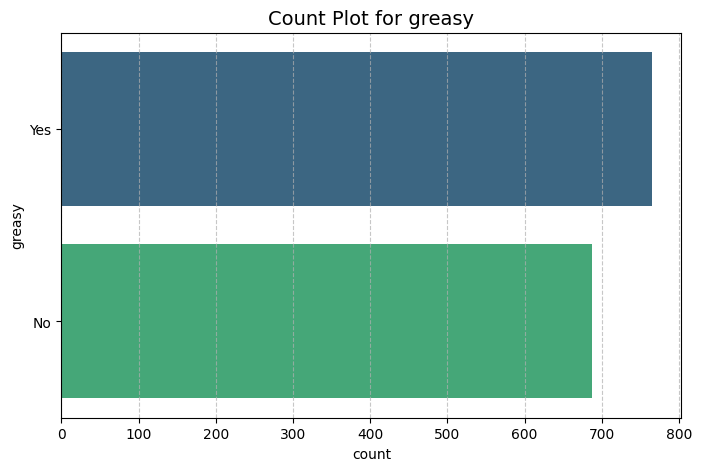

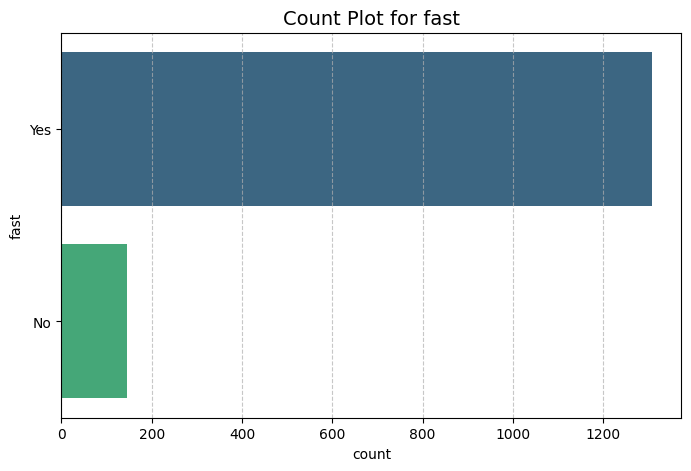

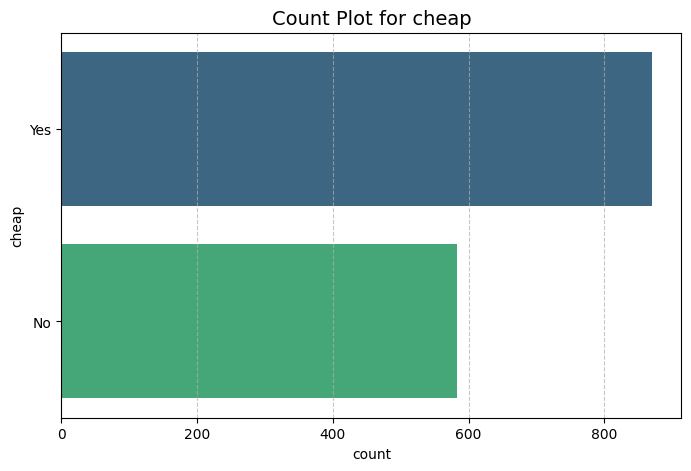

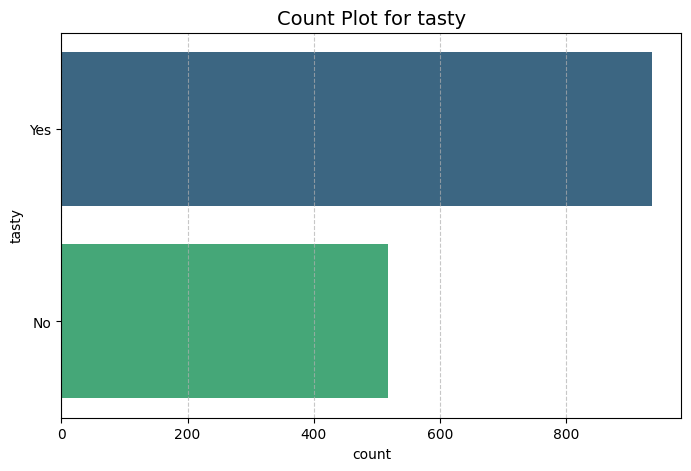

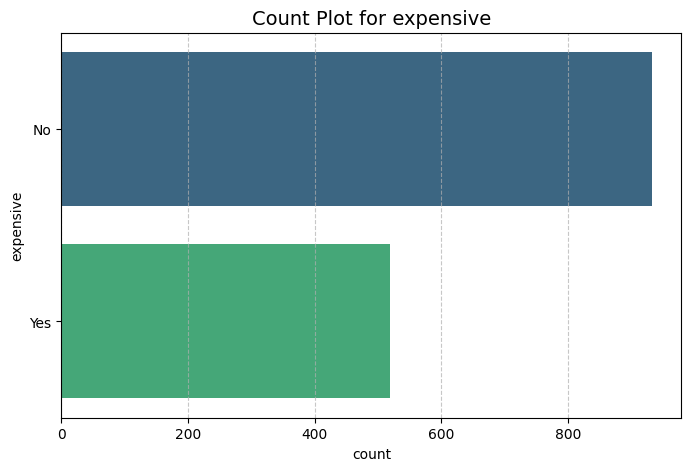

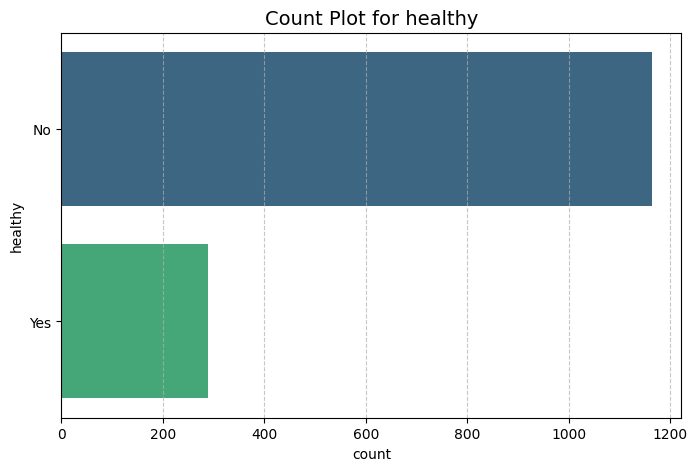

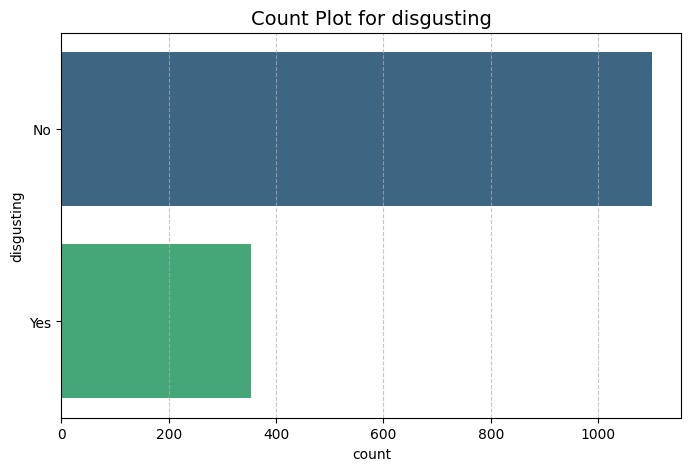

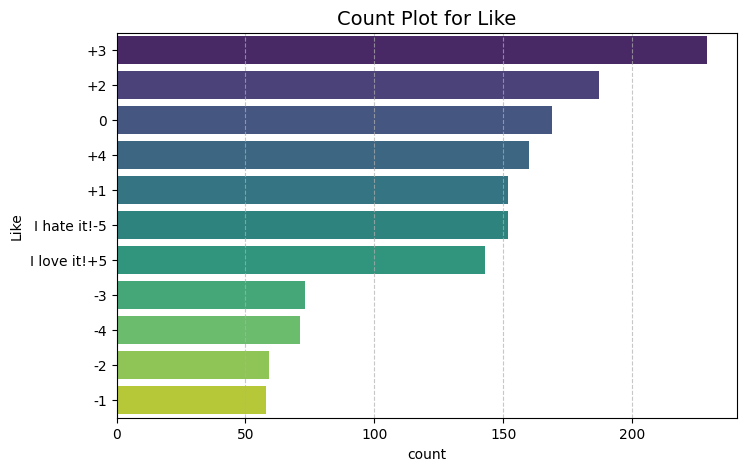

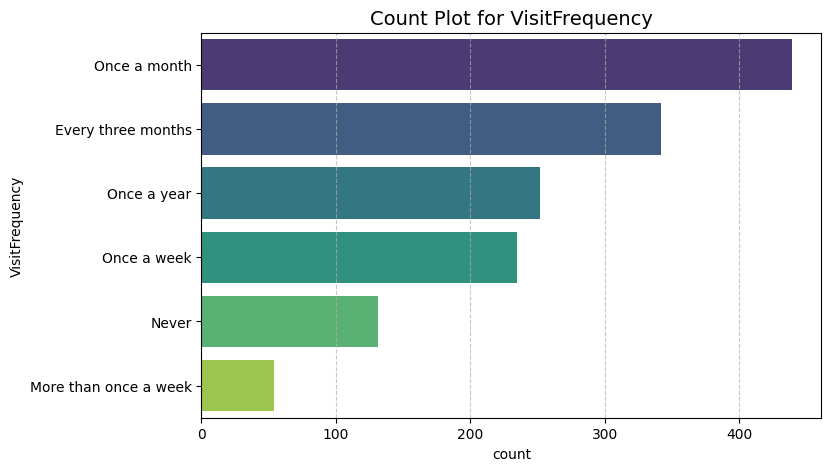

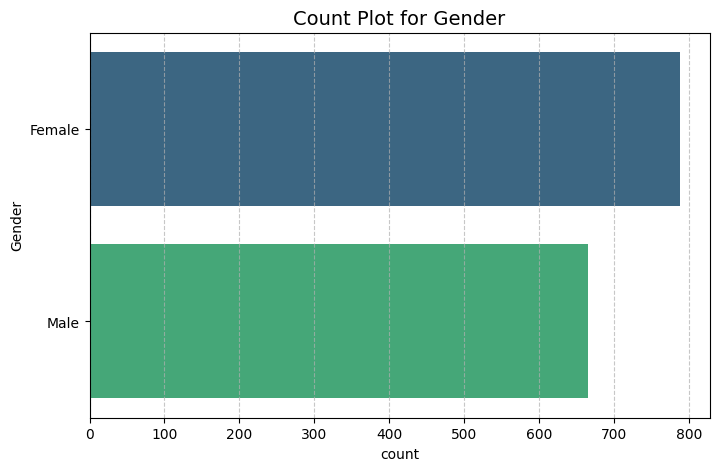

In [10]:
def plot_individual_countplots(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(y=df[column], palette='viridis', order=df[column].value_counts().index)
        plt.title(f'Count Plot for {column}', fontsize=14)
        plt.ylabel(column)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.show()
plot_individual_countplots(df)


In [11]:
def preprocess_mcdonalds_data(df):
    binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
                      'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
    df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

    like_mapping = {'-3': -3, '-2': -2, '-1': -1, '0': 0, '+1': 1, '+2': 2, '+3': 3, '+4': 4}
    df['Like'] = df['Like'].map(like_mapping)

    visit_mapping = {
        'Every day': 6, 'Once a week': 5, 'Once a month': 4, 
        'Every three months': 3, 'Once a year': 2, 'Never': 1
    }
    df['VisitFrequency'] = df['VisitFrequency'].map(visit_mapping)

    gender_mapping = {'Male': 1, 'Female': 0}
    df['Gender'] = df['Gender'].map(gender_mapping)

    return df

df = preprocess_mcdonalds_data(df)
print(df.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Like  Age  VisitFrequency  Gender  
0        0           0  -3.0   61             3.0       0  
1        0           0   2.0   51             3.0       0  
2        1           0   1.0   62             3.0       0  
3        0           1   4.0   69             5.0       0  
4        1           0   2.0   49             4.0       1  


In [12]:
# Drop rows with missing values
df_cleaned = df.dropna()


In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

print(df.isnull().sum())


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


Explained Variance Ratio: [0.22940533 0.12319999]


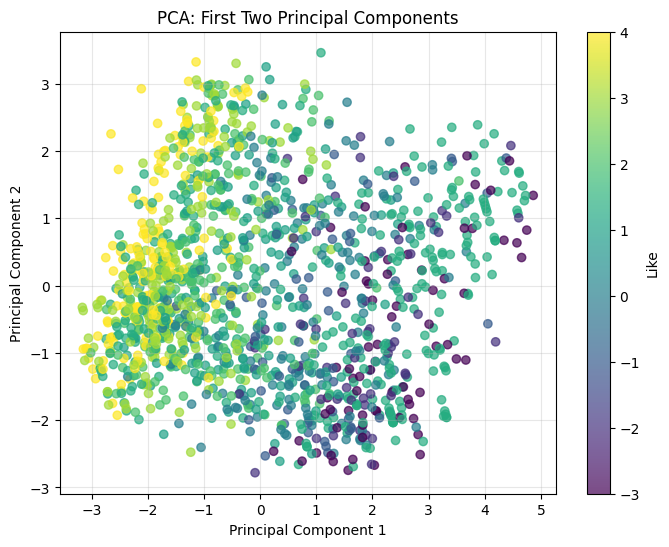

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Adjust n_components based on your need
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, c=df['Like'], cmap='viridis')  # Color by 'Like'
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Like')
plt.grid(alpha=0.3)
plt.show()
